# 互联网金融LeningClub贷款违约预测模型

## 1 项目简介
- 采用了Lending Club 信用贷款违约数据是美国网络贷款平台 LendingClub 的部分信用卡还款情况数据，主要包括是否违约和用户个人信息及信用卡流水情况，共30000条数据。
- 信用卡还款违约预测模型，使用了Numpy，Pandas，Sklearn科学计算包完成数据清洗，构建特征工程，以及完成预约模型的训练，数据可视化采用了Matplotlib及Seaborn等可视化包。

## 2  信贷数据分析过程

接下来，我们将利用给定的借贷数据，做一次较为完整的数据分析，进一步熟悉数据分析的流程。我们将分三个阶段来完成，分别是

1. 数据的初步分析和整理
2. 数据的探索性分析及可视化
3. 借贷违约预测（LogisticRegression）


### 2.1 数据的初步分析和整理

##### 2.1.1 导入相关数据分析及可视化包

In [58]:
#导入相关库
import numpy as np
import pandas as pd
import xlrd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')  #风格设置近似R这种的ggplot库

import seaborn as sns
sns.set_style('whitegrid')

导入LendingClub数据

In [59]:
#导入数据及预览前三行
data_15 = pd.read_excel("H:\experiment\Default OfCreditCardClients.xls",header=1)
data_15.head()
#data1.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [60]:
help(pd.read_excel)

Help on function read_excel in module pandas.io.excel:

read_excel(io, sheet_name=0, header=0, names=None, index_col=None, usecols=None, squeeze=False, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skiprows=None, nrows=None, na_values=None, parse_dates=False, date_parser=None, thousands=None, comment=None, skipfooter=0, convert_float=True, **kwds)
    Read an Excel table into a pandas DataFrame
    
    Parameters
    ----------
    io : string, path object (pathlib.Path or py._path.local.LocalPath),
        file-like object, pandas ExcelFile, or xlrd workbook.
        The string could be a URL. Valid URL schemes include http, ftp, s3,
        and file. For file URLs, a host is expected. For instance, a local
        file could be file://localhost/path/to/workbook.xlsx
    sheet_name : string, int, mixed list of strings/ints, or None, default 0
    
        Strings are used for sheet names, Integers are used in zero-indexed
        sheet positions.
    

统计数据每列的缺失值情况

In [61]:
#统计每列的缺失值情况
check_null = data_15.isnull().sum(axis=0).sort_values(ascending=False)/float(len(data_15)) #查看缺失值比例
#print(check_null[check_null > 0.2]) # 查看缺失比例大于20%的属性。
print(check_null)

default payment next month    0.0
PAY_6                         0.0
LIMIT_BAL                     0.0
SEX                           0.0
EDUCATION                     0.0
MARRIAGE                      0.0
AGE                           0.0
PAY_0                         0.0
PAY_2                         0.0
PAY_3                         0.0
PAY_4                         0.0
PAY_5                         0.0
BILL_AMT1                     0.0
PAY_AMT6                      0.0
BILL_AMT2                     0.0
BILL_AMT3                     0.0
BILL_AMT4                     0.0
BILL_AMT5                     0.0
BILL_AMT6                     0.0
PAY_AMT1                      0.0
PAY_AMT2                      0.0
PAY_AMT3                      0.0
PAY_AMT4                      0.0
PAY_AMT5                      0.0
ID                            0.0
dtype: float64


从上图中可以看出，数据集中列并没有缺失值 。

查看数据类型的大概分布情况

In [62]:
data_15.dtypes.value_counts() # 分类统计数据类型

int64    25
dtype: int64

对数据进行描述性统计

In [63]:
data_15.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [64]:
data_15.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [65]:
#便于理解将变量命设置为loans
loans=data_15
loans.shape

(30000, 25)

#### 2.1.3 数据过滤

本文的目的是对平台用户的违约做出预测，所以需要筛选得到一些对用户违约有影响的信息，其他不相关的冗余信息，需要将其删除掉。

首先查看所有的分类标签

In [66]:
loans.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

 - ID:所有的行都不同，只是作为一个标记，没有分类意义

将对构建预测模型没有意义的属性进行删除。

In [67]:
#删除对模型没有意义的列
loans2=loans.drop(['ID'], axis=1, inplace = True)
 

再次查看‘Object’类型变量，只剩下8个分类变量

In [68]:
object_columns_df3 =loans.select_dtypes(include=["object"]) #筛选数据类型为object的变量
print(object_columns_df3.iloc[0])

Series([], Name: 0, dtype: float64)


### 2.2 数据的探索性分析及可视化

数据预处理完后，接下来探索数据的特征工程，为后续的违约预测模型做好建模准备工作

特征工程是机器学习最重要的一部分，希望找到的特征是最贴近实际业务场景的，所以要反复去找特征，只需要最少的特征得到简单的模型，并且有最好的预测效果。

本节将特征工程主要分3大部分：特征抽象 、特征缩放 、特征选择

#### 2.2.1 特征抽象

通常数据集中有很多的“Object”类型的分类变量存在，但是对于这种变量，机器学习算法不能识别，需要将其转化为算法能识别的数据类型。所幸我们这个数据集都输数值型变量，节省了这一步骤。

**可以查看目标变量对于"default payment next month"数据分布**

In [69]:
#统计"default payment next month"数据的分布
loans['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

将上表中的违约编码为1，正常的为0进行编码

可视化查看"loan_status"中不同状态的替换情况

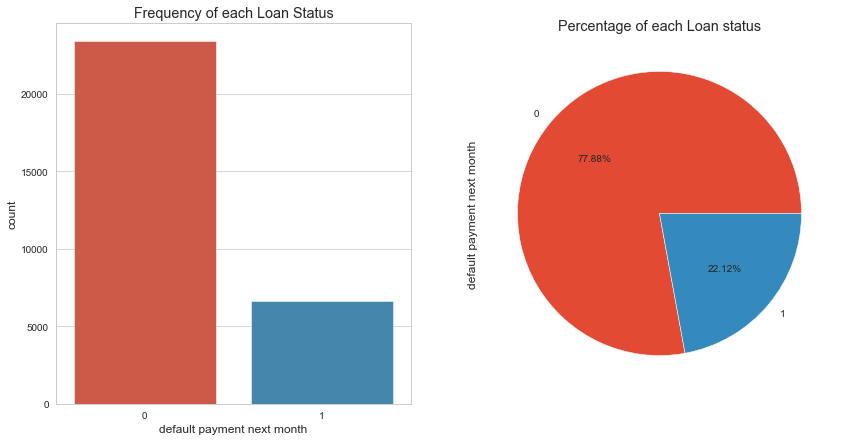

In [70]:
# 贷款状态分布可视化
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='default payment next month',data=loans,ax=axs[0])
axs[0].set_title("Frequency of each Loan Status")
loans['default payment next month'].value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Loan status")
plt.show()

重新查看数据集中的数据类型

In [71]:
loans.info() #查看数据信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                

#### 2.2.2 特征缩放

采用标准化的方法进行去量纲操作，加快算法收敛速度，采用scikit-learn模块preprocessing的子模块StandardScaler进行操作。

In [72]:
col = loans.select_dtypes(include=['int64','float64']).columns
#col = col.drop('loan_status') #剔除目标变量
col = col.drop('default payment next month') #剔除目标变量
loans_ml_df = loans # 复制数据至变量loans_ml_df


from sklearn.preprocessing import StandardScaler # 导入模块
sc =StandardScaler() # 初始化缩放器
loans_ml_df[col] =sc.fit_transform(loans_ml_df[col]) #对数据进行标准化
loans_ml_df.head() #查看经标准化后的数据

C:\Users\fu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\fu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,-1.136720,0.810161,0.185828,-1.057295,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,...,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1
1,-0.365981,0.810161,0.185828,0.858557,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,...,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1
2,-0.597202,0.810161,0.185828,0.858557,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,...,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,0
3,-0.905498,0.810161,0.185828,-1.057295,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,...,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0
4,-0.905498,-1.234323,0.185828,-1.057295,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,...,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,0


以上过程完成了非数值型特征抽象化处理，使得算法能理解数据集中的数据，这么多的特征，究竟哪些特征对预测结果影响较大，所以以下通过影响大小对特征进行选择。

#### 2.2.3 特征选择

特征的选择优先选取与预测目标相关性较高的特征，不相关特征可能会降低分类的准确率，因此为了增强模型的泛化能力，我们需要从原有特征集合中挑选出最佳的部分特征，并且降低学习的难度，能够简化分类器的计算，同时帮助了解分类问题的因果关系。

一般来说，根据特征选择的思路将特征选择分为3种方法：嵌入方法（embedded approach）、过滤方法（filter approach）、包装方法（wrapper approacch）。

- 过滤方法（filter approach）: 通过自变量之间或自变量与目标变量之间的关联关系选择特征。
- 嵌入方法（embedded approach）: 通过学习器自身自动选择特征。
- 包装方法（wrapper approacch）: 通过目标函数（AUC/MSE）来决定是否加入一个变量。
    
本次项目采用Filter、Embedded和Wrapper三种方法组合进行特征选择。

首先将数据集中的贷款状态'default payment next month'抽离出来

In [73]:
#构建X特征变量和Y目标变量
x_feature = list(loans_ml_df.columns)
x_feature.remove('default payment next month')
x_val = loans_ml_df[x_feature]
y_val = loans_ml_df['default payment next month']
len(x_feature) # 查看初始特征集合的数量

23

重新查看没有贷款状态'default payment next month'的数据集

In [74]:
x_val.describe().T # 初览数据

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,2.436569e-17,1.000017,-1.213794,-0.905498,-0.211833,0.558907,6.416528
SEX,30000.0,-1.597606e-14,1.000017,-1.234323,-1.234323,0.810161,0.810161,0.810161
EDUCATION,30000.0,5.569768e-15,1.000017,-2.344743,-1.079457,0.185828,0.185828,5.246970
MARRIAGE,30000.0,-2.564186e-15,1.000017,-2.973147,-1.057295,0.858557,0.858557,2.774410
AGE,30000.0,-7.286024e-17,1.000017,-1.571479,-0.812074,-0.161156,0.598248,4.720729
PAY_0,30000.0,-7.559566e-17,1.000017,-1.764843,-0.874991,0.014861,0.014861,7.133674
PAY_2,30000.0,-1.586202e-15,1.000017,-1.558876,-0.723570,0.111736,0.111736,6.794184
PAY_3,30000.0,-1.135055e-16,1.000017,-1.532192,-0.696663,0.138865,0.138865,6.823091
PAY_4,30000.0,-3.630355e-15,1.000017,-1.521944,-0.666599,0.188746,0.188746,7.031505
PAY_5,30000.0,-7.266021e-16,1.000017,-1.530046,-0.647565,0.234917,0.234917,7.294767


**Wrapper方法**

选出与目标变量相关性较高的特征。通过暴力的递归特征消除 (Recursive Feature Elimination)方法筛选30个与目标变量相关性最强的特征，将特征维度从23个降到20个。

In [75]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# 建立逻辑回归分类器
model = LogisticRegression()
# 建立递归特征消除筛选器
rfe = RFE(model, 20) #通过递归选择特征，选择20个特征
rfe = rfe.fit(x_val, y_val)
# 打印筛选结果
print(rfe.support_)
print(rfe.ranking_) #ranking 为 1代表被选中，其他则未被代表未被选中

C:\Users\fu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\fu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\fu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\fu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[ True  True  True  True  True  True  True  True  True  True False  True
  True  True False  True False  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 4 1 1 1 3 1 2 1 1 1 1 1 1]


通过布尔值筛选首次降维后的变量

In [76]:
col_filter = x_val.columns[rfe.support_] #通过布尔值筛选首次降维后的变量
col_filter # 查看通过递归特征消除法筛选的变量

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT5', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6'],
      dtype='object')

**Filter方法**

正常情况下，影响目标变量的因数是多元性的；但不同因数之间会互相影响（共线性 ），或相重叠，进而影响到统计结果的真实性。下一步，以下通过皮尔森相关性图谱找出冗余特征并将其剔除，且通过相关性图谱进一步引导我们选择特征的方向。

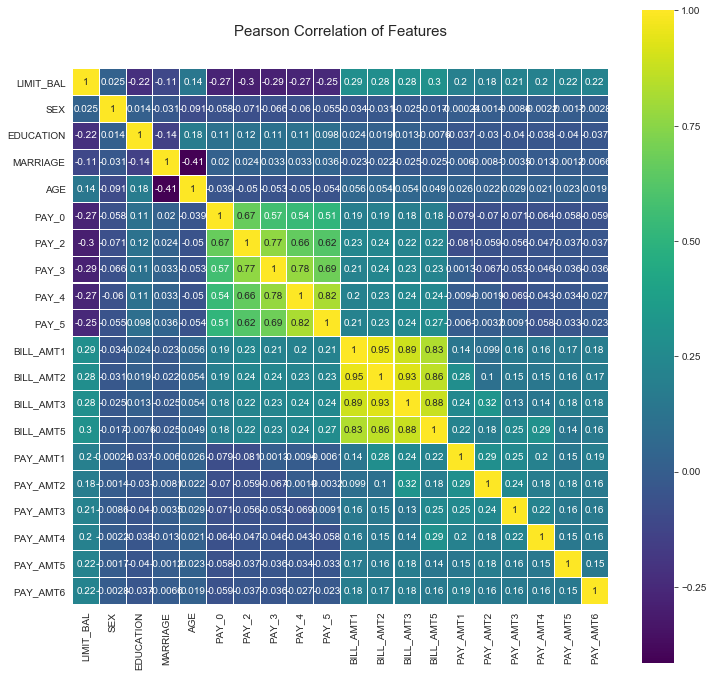

In [77]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(loans_ml_df[col_filter].corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

从上图中得到需要删除的冗余特征

In [78]:
drop_col = [
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',  'BILL_AMT2',
       'BILL_AMT3',  'BILL_AMT5' ]
col_new = col_filter.drop(drop_col) #剔除冗余特征
print(len(col_new))

13


特征从20个降到13个，再次确认处理后的数据相关性

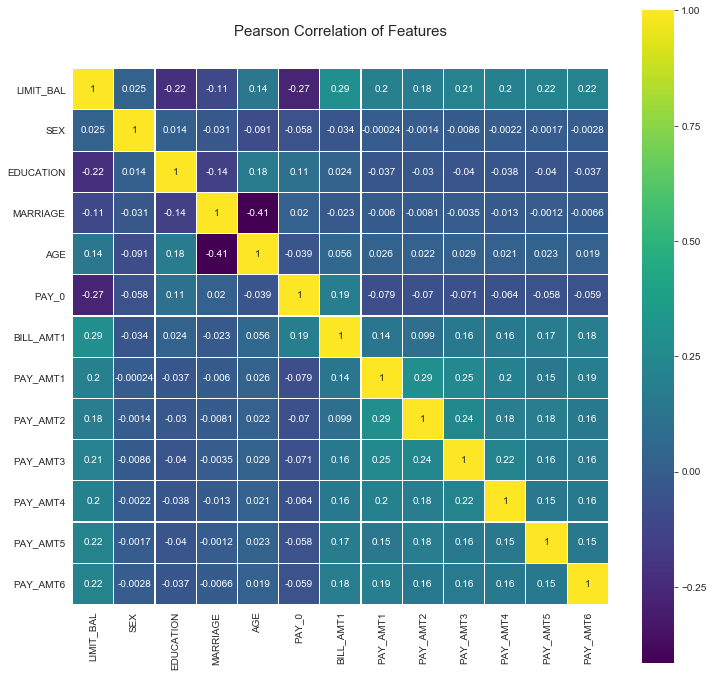

In [79]:
col_new # 查看剩余的特征
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(loans_ml_df[col_new].corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

**Embedded方法**

为了了解每个特征对贷款违约预测的影响程度，所以在进行模型训练之前，我们需要对特征的权重有一个正确的评判和排序，就可以通过特征重要性排序来挖掘哪些变量是比较重要的，降低学习难度，最终达到优化模型计算的目的

In [80]:
#随机森林算法判定特征的重要性
names = loans_ml_df[col_new].columns
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=10,random_state=123)#构建分类随机森林分类器
clf.fit(x_val[col_new], y_val) #对自变量和因变量进行拟合
names, clf.feature_importances_
for feature in zip(names, clf.feature_importances_):
    print(feature)

('LIMIT_BAL', 0.08319730548361048)
('SEX', 0.01719755698378092)
('EDUCATION', 0.02750695813718267)
('MARRIAGE', 0.019781839237639612)
('AGE', 0.09689581044924164)
('PAY_0', 0.16488529549266534)
('BILL_AMT1', 0.11059292225474467)
('PAY_AMT1', 0.08877971038770915)
('PAY_AMT2', 0.08469916799090234)
('PAY_AMT3', 0.07849980375370604)
('PAY_AMT4', 0.0755913991490162)
('PAY_AMT5', 0.07859358169089502)
('PAY_AMT6', 0.07377864898890585)


特征重要性从大到小排序，结果发现最具判别效果的特征是当期支付总额‘PAY_0’

### 2.3 借贷违约预测模型（LogisticRegression）

#### 2.3.1 模型训练

采用逻辑回归分类器 分类器进行训练

In [81]:
# 构建逻辑回归分类器
X = loans_ml_df[col_new]
y = loans_ml_df["default payment next month"]
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression() 
clf1.fit(X, y)

C:\Users\fu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

在上述参数中，C=1.0表示正则化参数设定为1,正则化是逻辑回归中的高级算法，用以防止算法过拟合的问题，这里C是正则化中些函数设定的约束条件值，C值越小，则正则化强度越大。

penaly代表了正则化中惩罚项的种类选择，是还是"l1"还是"l2",其中，"l1"代表向量中各元素绝对值的和，作用是产生少量的特征，而其他的特征都是0.常用于特征选择；"l2"代表向量中各个元素平方之和再开根号，其作用是选择较多的特征，使它们都趋近于0。这些都是高级算法的内容，读者可酌情涉及。

solver = "liblinear"则是算法的优化方法选择，在这里lblinear表示使用了开源的lblinear库实现，内部使用了坐标轴下降法来选代优化损失函数，为默认算法。另外还有其他选择项，比如Ibfgs就是拟牛顿法的一种，利用损失函数二阶导数矩阵即海森矩阵来迭代优化损失函数;sag则是随机平均梯度下降算法，是梯度下降法的变种，和普通梯度下降法的区别是每次迭代仅仅用-部分的样本来计算梯度，适合于样本数据多的时候。

另外，max_ iter=100 表示最大选代次数为100，tol=0.0001 表示迭代截止的规则，-般是逻辑回归算法预测偏误的一个设定值。

上述结果中只列出了14个LogiisticRgerssion模块的参数，在这里只对其中几个比较重要的参数进行介绍，更多的可以参考sklearn官方文档。

In [82]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model.logistic:

class LogisticRegression(sklearn.base.BaseEstimator, sklearn.linear_model.base.LinearClassifierMixin, sklearn.linear_model.base.SparseCoefMixin)
 |  LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='warn', max_iter=100, multi_class='warn', verbose=0, warm_start=False, n_jobs=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the cross-
 |  entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 'sag' and 'lbfgs' solvers. It c

基于sklearn得到的参数值

In [83]:
clf1.coef_

array([[-0.1690312 , -0.05957894, -0.07547474, -0.08231676,  0.06319234,
         0.7753903 , -0.05955229, -0.16508423, -0.19528927, -0.04908086,
        -0.05787751, -0.04887109, -0.04061289]])

In [90]:
import statsmodels.api as sm
print(clf1.summary())

AttributeError: 'LogisticRegression' object has no attribute 'summary'

查看预测结果的准确率

In [84]:
predicted1 = clf.predict(X) # 通过分类器产生预测结果
from sklearn.metrics import accuracy_score
print("Test set accuracy score: {:.5f}".format(accuracy_score(predicted1, y,)))

Test set accuracy score: 0.97937


利用混淆矩阵及可视化观察预测结果

In [85]:
#生成混淆矩阵
from sklearn.metrics import confusion_matrix
confusion_matrix(y, predicted1)

array([[23325,    39],
       [  580,  6056]], dtype=int64)

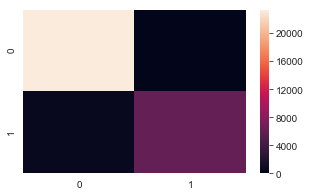

In [86]:
# 混淆矩阵可视化
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y, predicted1))

再利用sklearn.metrics子模块classification_report查看precision、recall、f1-score的值

In [87]:
#查看precision、recall、f1-score的值
from sklearn.metrics import classification_report
print(classification_report(y, predicted1))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     23364
           1       0.99      0.91      0.95      6636

   micro avg       0.98      0.98      0.98     30000
   macro avg       0.98      0.96      0.97     30000
weighted avg       0.98      0.98      0.98     30000



In [88]:
#计算ROC值
from sklearn.metrics import roc_auc_score
roc_auc1 = roc_auc_score(y, predicted1)
print("Area under the ROC curve : %f" % roc_auc1)

Area under the ROC curve : 0.955464


以上完成了全部的模型训练及预测工作。

## 3. 小结

本文基于互联网金融平台贷款数据完成信贷违约预测模型，全文包括了数据清洗，构建特征工程，训练模型，最后得到的模型准确率达到了0.97,具有较好的预测性，本文的模型可以作为信贷平台预测违约借款人的参考